<a href="https://colab.research.google.com/github/muralivakada/6220-Project/blob/main/Lumpy_skin_5_5kc_88_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## **Upload File**

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/muralivakada/6220-Project/main/Lumpy%20skin%20disease%20data%20(5.5k).csv')
df.head(n=50)

,cld,dtr,frs,pet,vap,wet,elevation,lumpy
0,41.6,12.8,0.00,2.3,15.7,0.00,147,1
1,40.5,13.3,0.00,2.4,16.3,0.00,145,1
2,27.3,13.6,0.08,2.3,13.0,0.98,158,1
3,45.3,12.8,31.00,0.4,0.9,4.64,178,1
4,38.8,13.2,31.00,0.4,1.2,1.69,185,1
5,38.8,13.2,31.00,0.4,1.2,1.69,185,1
6,38.8,13.2,31.00,0.4,1.2,1.69,185,1
7,45.3,12.8,31.00,0.4,0.9,4.64,178,1
8,38.8,13.2,31.00,0.4,1.2,1.69,185,1
9,38.8,13.2,31.00,0.4,1.2,1.69,185,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cld        5500 non-null   float64
 1   dtr        5500 non-null   float64
 2   frs        5500 non-null   float64
 3   pet        5500 non-null   float64
 4   vap        5500 non-null   float64
 5   wet        5500 non-null   float64
 6   elevation  5500 non-null   int64  
 7   lumpy      5500 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 343.9 KB


In [6]:
df.isnull().sum()

cld          0
dtr          0
frs          0
pet          0
vap          0
wet          0
elevation    0
lumpy        0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

cld          0
dtr          0
frs          0
pet          0
vap          0
wet          0
elevation    0
lumpy        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cld        5500 non-null   float64
 1   dtr        5500 non-null   float64
 2   frs        5500 non-null   float64
 3   pet        5500 non-null   float64
 4   vap        5500 non-null   float64
 5   wet        5500 non-null   float64
 6   elevation  5500 non-null   int64  
 7   lumpy      5500 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 386.7 KB


### **Classes**

In [10]:
Y = df['lumpy']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: lumpy, dtype: int64

In [11]:
df = df.drop(['lumpy'], axis = 1)

In [12]:
df.head()

,cld,dtr,frs,pet,vap,wet,elevation
0,41.6,12.8,0.00,2.3,15.7,0.00,147
1,40.5,13.3,0.00,2.4,16.3,0.00,145
2,27.3,13.6,0.08,2.3,13.0,0.98,158
3,45.3,12.8,31.00,0.4,0.9,4.64,178
4,38.8,13.2,31.00,0.4,1.2,1.69,185


### **Features**

In [13]:
# Visualize features with proper names
df = df[['cld', 'dtr', 'frs', 'pet','vap','wet','elevation']]
df.head(10)

,cld,dtr,frs,pet,vap,wet,elevation
0,41.6,12.8,0.00,2.3,15.7,0.00,147
1,40.5,13.3,0.00,2.4,16.3,0.00,145
2,27.3,13.6,0.08,2.3,13.0,0.98,158
3,45.3,12.8,31.00,0.4,0.9,4.64,178
4,38.8,13.2,31.00,0.4,1.2,1.69,185
5,38.8,13.2,31.00,0.4,1.2,1.69,185
6,38.8,13.2,31.00,0.4,1.2,1.69,185
7,45.3,12.8,31.00,0.4,0.9,4.64,178
8,38.8,13.2,31.00,0.4,1.2,1.69,185
9,38.8,13.2,31.00,0.4,1.2,1.69,185


In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cld,5500.0,53.944945,23.424938,7.0,33.10,57.20,77.90,88.6
dtr,5500.0,10.236636,3.753359,3.3,6.70,8.40,13.70,19.4
frs,5500.0,15.054265,12.620842,0.0,0.28,15.52,26.19,31.0
pet,5500.0,1.569000,1.176912,0.0,0.70,1.00,2.30,7.3
vap,5500.0,7.147636,5.117718,0.0,3.80,6.25,10.40,27.0
wet,5500.0,6.072071,5.323516,0.0,0.45,7.10,10.80,21.6
elevation,5500.0,164.524000,24.834450,69.0,149.00,161.00,177.00,247.0


Notice that the data is not standardizd.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Scale features
minmax = MinMaxScaler(feature_range = (0, 1))
df[['cld', 'dtr', 'frs', 'pet','vap','wet','elevation']] = minmax.fit_transform(df[['cld','dtr','frs','pet','vap','wet','elevation']])
df[['cld', 'dtr', 'frs', 'pet','vap','wet','elevation']].head()

,cld,dtr,frs,pet,vap,wet,elevation
0,0.424020,0.590062,0.000000,0.315068,0.581481,0.000000,0.438202
1,0.410539,0.621118,0.000000,0.328767,0.603704,0.000000,0.426966
2,0.248775,0.639752,0.002581,0.315068,0.481481,0.045370,0.500000
3,0.469363,0.590062,1.000000,0.054795,0.033333,0.214815,0.612360
4,0.389706,0.614907,1.000000,0.054795,0.044444,0.078241,0.651685


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cld,5500.0,0.575306,0.287070,0.0,0.319853,0.615196,0.868873,1.0
dtr,5500.0,0.430847,0.233128,0.0,0.211180,0.316770,0.645963,1.0
frs,5500.0,0.485621,0.407124,0.0,0.009032,0.500645,0.844839,1.0
pet,5500.0,0.214932,0.161221,0.0,0.095890,0.136986,0.315068,1.0
vap,5500.0,0.264727,0.189545,0.0,0.140741,0.231481,0.385185,1.0
wet,5500.0,0.281114,0.246459,0.0,0.020833,0.328704,0.500000,1.0
elevation,5500.0,0.536652,0.139519,0.0,0.449438,0.516854,0.606742,1.0


Notice that the data is now standardizd.

**Observations and variables**

In [17]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

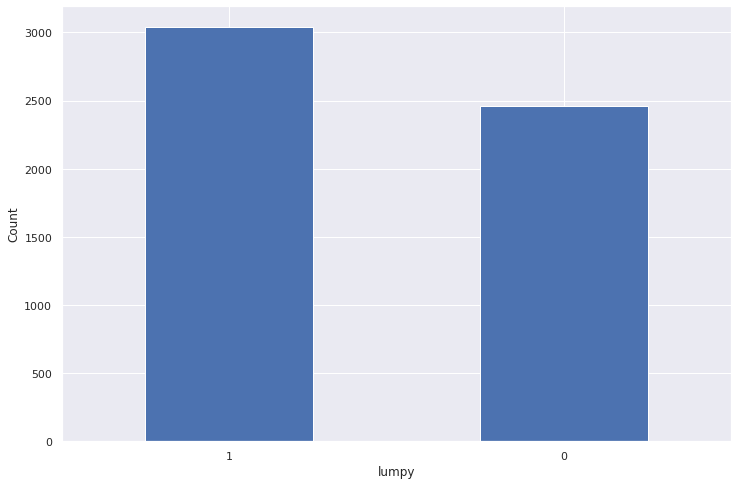

In [29]:
Y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('lumpy')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

[Text(0, 0, 'cld'),
 Text(0, 0, 'dtr'),
 Text(0, 0, 'frs'),
 Text(0, 0, 'pet'),
 Text(0, 0, 'vap'),
 Text(0, 0, 'wet'),
 Text(0, 0, 'elevation')]

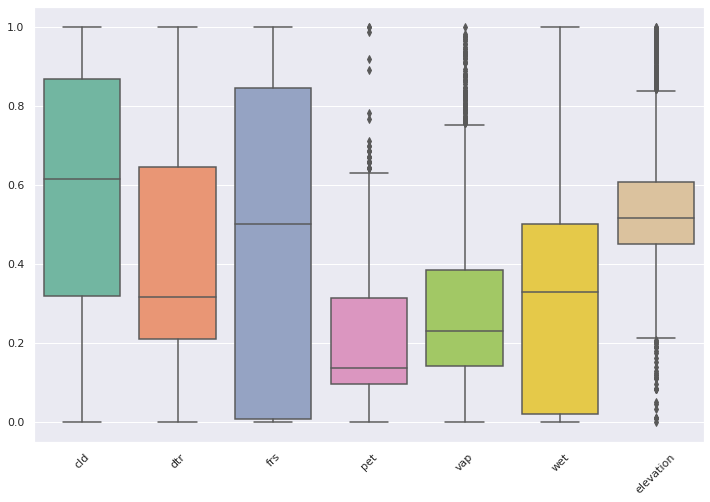

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'cld'),
 Text(0, 0, 'dtr'),
 Text(0, 0, 'frs'),
 Text(0, 0, 'pet'),
 Text(0, 0, 'vap'),
 Text(0, 0, 'wet'),
 Text(0, 0, 'elevation')]

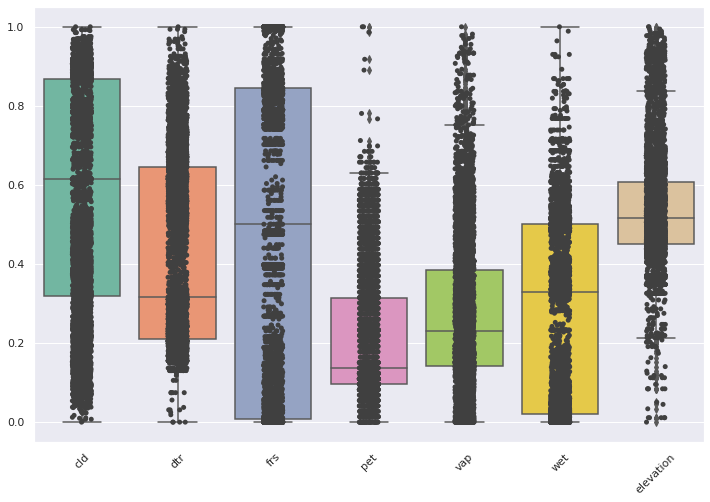

In [20]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### Five Number Summary

In [21]:
df.describe()

,cld,dtr,frs,pet,vap,wet,elevation
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.575306,0.430847,0.485621,0.214932,0.264727,0.281114,0.536652
std,0.287070,0.233128,0.407124,0.161221,0.189545,0.246459,0.139519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319853,0.211180,0.009032,0.095890,0.140741,0.020833,0.449438
50%,0.615196,0.316770,0.500645,0.136986,0.231481,0.328704,0.516854
75%,0.868873,0.645963,0.844839,0.315068,0.385185,0.500000,0.606742
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Pair Plot

<Figure size 864x576 with 0 Axes>

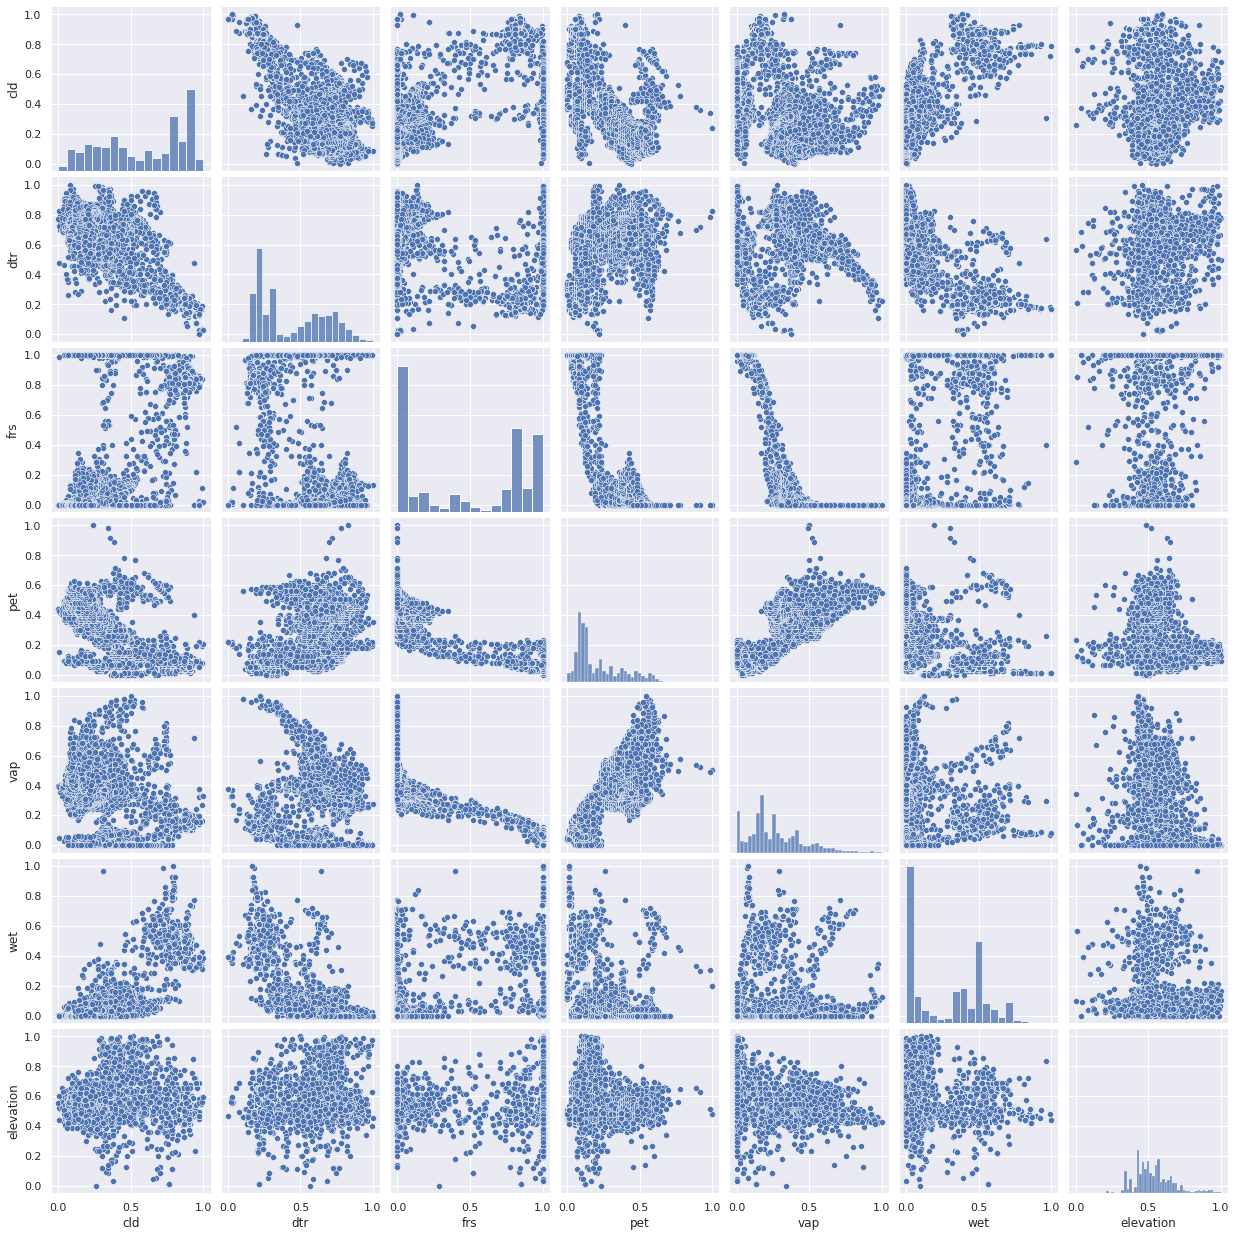

In [22]:
ax = plt.figure()
ax = sns.pairplot(df)

## **Covariance**

Text(0.5, 1.0, 'Covariance matrix')

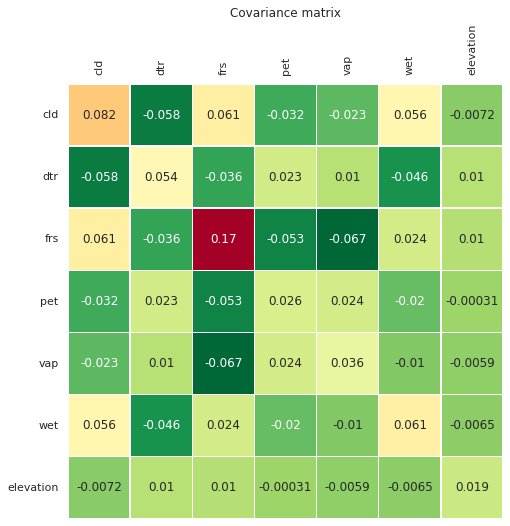

In [23]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

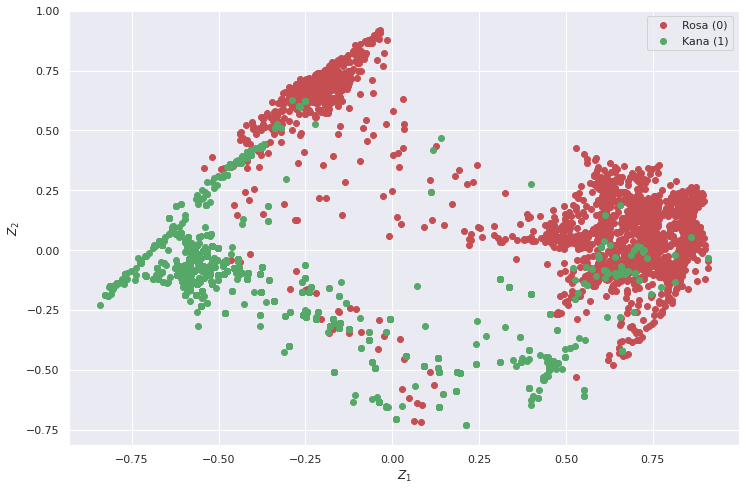

In [24]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(Y == 0)
idx_Kana = np.where(Y == 1)


plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')


### **Eigenvectors**

Eigenvector matrix:
[[-4.53827127e-01 -3.98554388e-01 -3.64312862e-02  5.16474819e-01
  -6.02365083e-01 -2.94342586e-03 -6.53414490e-02]
 [ 3.19100732e-01  4.17640656e-01  2.66375580e-01 -1.28263334e-01
  -6.02677431e-01  3.52290916e-01 -3.86024090e-01]
 [-6.76479364e-01  5.52922283e-01 -1.38875857e-01  7.42694051e-02
   2.20640596e-01  3.99207850e-01 -6.16521696e-02]
 [ 2.72315996e-01 -3.90017546e-02 -6.55671851e-03  2.52230179e-01
  -4.23426925e-02  5.98893871e-01  7.07243265e-01]
 [ 2.76354059e-01 -2.70044615e-01 -1.80319664e-01  4.11081529e-01
   3.94887360e-01  3.95197365e-01 -5.80589486e-01]
 [-2.89937435e-01 -5.00750233e-01  4.95590609e-01 -4.94506635e-01
   1.01201088e-01  4.00235890e-01 -6.78836946e-02]
 [-2.17863475e-04  1.89239543e-01  7.93890474e-01  4.83881633e-01
   2.39339420e-01 -2.03646620e-01  3.20862088e-02]]


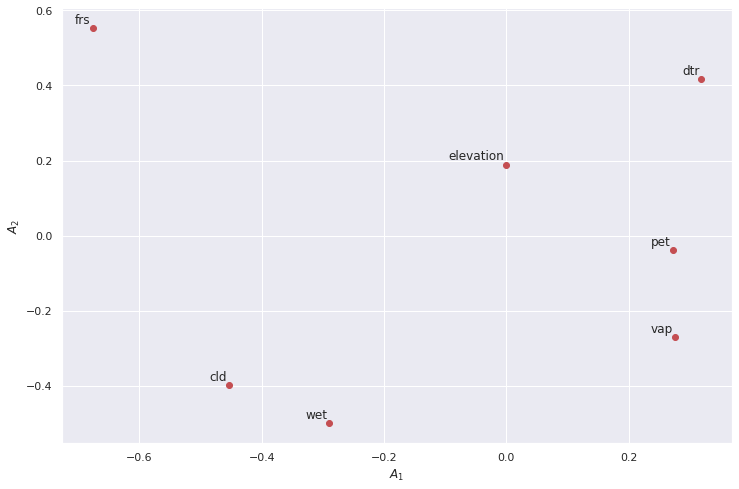

In [25]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


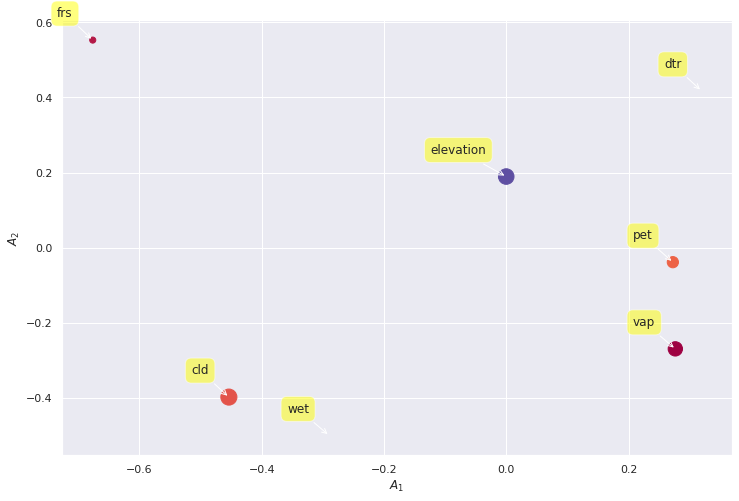

In [26]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

Eigenvalues:
[0.28275575 0.11263821 0.01882339 0.01198546 0.00839145 0.00669846
 0.0033424 ]


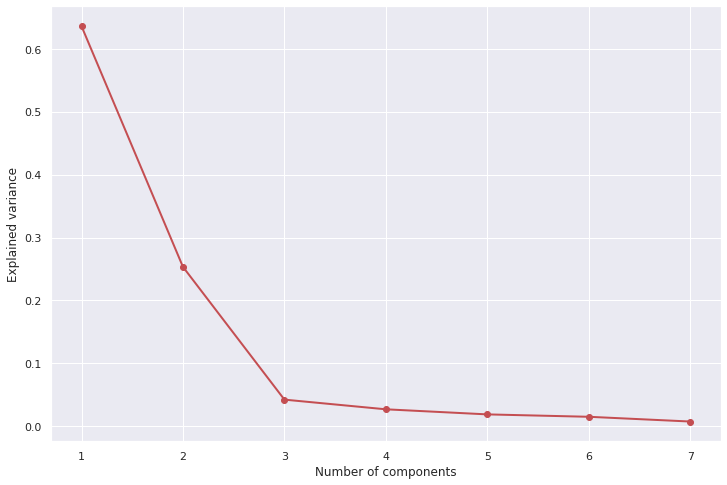

Explained variance per component:
[0.63592762 0.25332729 0.04233446 0.02695573 0.01887266 0.01506507
 0.00751717]


In [27]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')
#'Area', 'Perimeter', 'Comp', 'Length_kernel', 'Width', 'Asymmetry', 'Length_groove'

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=2)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

print(f'Explained variance per component:\n{(Lambda/sum(Lambda))}')

### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

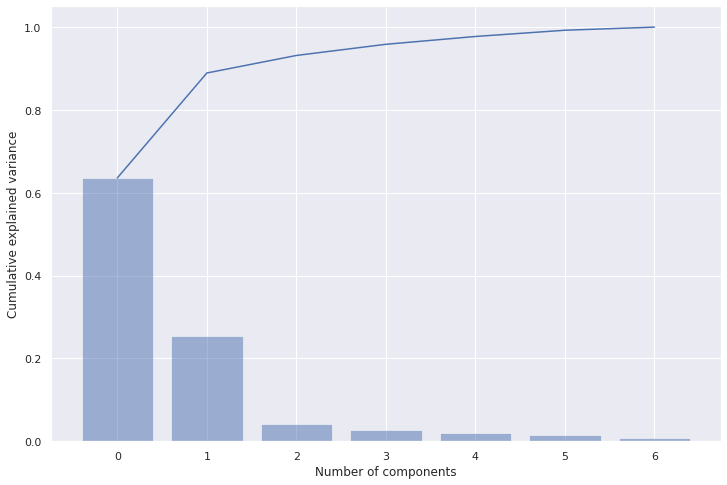

In [28]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### **Biplot**

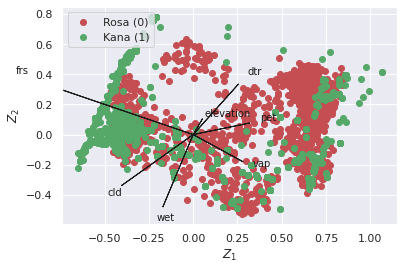

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

### **Principal components**

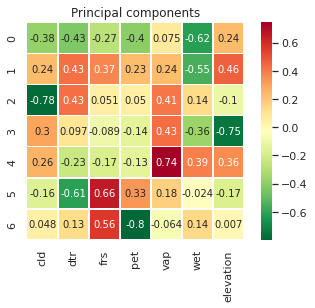

PC1:[-0.37662241  0.23871036 -0.78492072  0.29786446  0.26178228 -0.15970485
  0.04809939]
PC2:[-0.42934877  0.42571822  0.4283663   0.09735721 -0.22843449 -0.6102003
  0.13007996]


In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

#'Area', 'Perimeter', 'Comp', 'Length_kernel', 'Width', 'Asymmetry', 'Length_groove'
print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

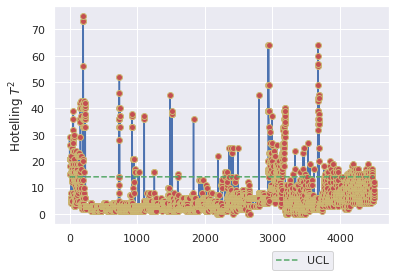

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[   0]
 [   1]
 [   2]
 [   3]
 [   4]
 [   5]
 [   6]
 [   7]
 [   8]
 [   9]
 [  10]
 [  11]
 [  12]
 [  13]
 [  14]
 [  15]
 [  16]
 [  17]
 [  18]
 [  19]
 [  20]
 [  31]
 [  32]
 [  33]
 [  35]
 [  36]
 [  37]
 [  39]
 [  41]
 [  43]
 [  44]
 [  45]
 [  46]
 [  48]
 [  49]
 [  50]
 [  51]
 [  52]
 [  54]
 [  55]
 [  56]
 [  57]
 [  58]
 [  61]
 [  62]
 [  63]
 [  64]
 [  66]
 [  69]
 [  72]
 [  73]
 [  74]
 [  76]
 [  78]
 [  94]
 [  96]
 [ 100]
 [ 105]
 [ 106]
 [ 107]
 [ 109]
 [ 110]
 [ 111]
 [ 117]
 [ 127]
 [ 128]
 [ 129]
 [ 130]
 [ 131]
 [ 132]
 [ 133]
 [ 134]
 [ 135]
 [ 136]
 [ 137]
 [ 138]
 [ 147]
 [ 148]
 [ 149]
 [ 150]
 [ 151]
 [ 155]
 [ 156]
 [ 157]
 [ 158]
 [ 159]
 [ 160]
 [ 161]
 [ 162]
 [ 163]
 [ 164]
 [ 165]
 [ 171]
 [ 172]
 [ 196]
 [ 197]
 [ 198]
 [ 199]
 [ 201]
 [ 202]
 [ 203]
 [ 204]
 [ 205]
 [ 206]
 [ 207]
 [ 208]
 [ 213]
 [ 215]
 [ 216]
 [ 217]
 [ 218]
 [ 219]
 [ 220]
 [ 221]
 [ 222]
 [ 223]
 [ 224]
 [ 225]
 [ 226]
 [ 227]
 [ 228]
 [ 229]
 [ 230]
 [ 231]
 [ 232]


### **Control Charts for Principal Components**

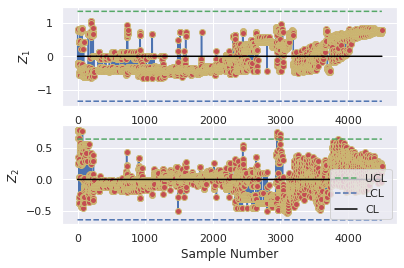

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[[   3]
 [   4]
 [   5]
 [   6]
 [   7]
 [   8]
 [   9]
 [  10]
 [  11]
 [  12]
 [  13]
 [  14]
 [  15]
 [  16]
 [  17]
 [  18]
 [  19]
 [  20]
 [  73]
 [2949]
 [2951]
 [2952]
 [2997]
 [3000]]


## **Multi-Class Classification**

In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 3150
Test Dataset Size: 1350


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.666     0.622     0.643       429
           1      0.829     0.855     0.842       921

    accuracy                          0.781      1350
   macro avg      0.748     0.738     0.743      1350
weighted avg      0.777     0.781     0.779      1350



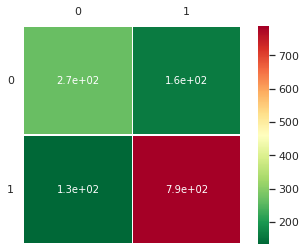

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.715     0.585     0.644       429
           1      0.822     0.891     0.855       921

    accuracy                          0.794      1350
   macro avg      0.768     0.738     0.749      1350
weighted avg      0.788     0.794     0.788      1350



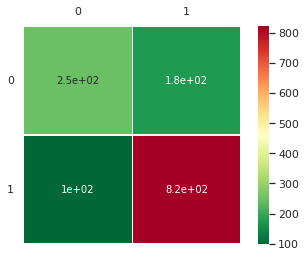

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.780     0.594     0.675       429
           1      0.830     0.922     0.873       921

    accuracy                          0.818      1350
   macro avg      0.805     0.758     0.774      1350
weighted avg      0.814     0.818     0.810      1350



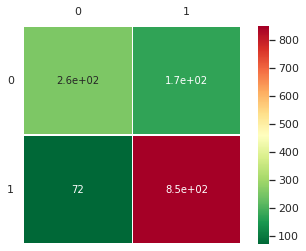

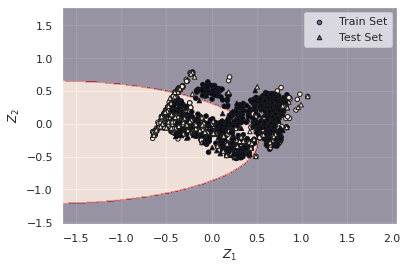

(array([  13,   14,   36,   39,   50,   55,   62,   65,   66,   67,   70,
         71,   81,   89,   91,   93,   94,   99,  104,  107,  112,  113,
        125,  129,  135,  140,  141,  142,  145,  149,  151,  163,  165,
        167,  172,  195,  200,  201,  217,  223,  225,  227,  248,  259,
        267,  275,  277,  283,  292,  302,  307,  313,  314,  320,  325,
        329,  331,  344,  345,  365,  368,  373,  391,  393,  395,  403,
        407,  413,  415,  417,  419,  423,  427,  430,  434,  437,  438,
        447,  453,  454,  459,  464,  466,  471,  476,  477,  479,  486,
        488,  501,  517,  523,  531,  534,  535,  543,  555,  558,  563,
        576,  588,  611,  615,  626,  629,  631,  644,  647,  649,  651,
        658,  661,  675,  694,  706,  712,  722,  727,  732,  739,  740,
        741,  748,  758,  767,  770,  771,  775,  783,  792,  804,  814,
        816,  825,  830,  835,  838,  852,  855,  856,  859,  861,  863,
        866,  867,  870,  872,  874,  897,  900,  

In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 4}
k_Z: {'n_neighbors': 4}
k_Z12: {'n_neighbors': 4}
                                    0         1         2         3         4
knn_full_data fit_time       0.006813  0.004619  0.004963  0.004738  0.004756
knn_Z  fit_time              0.003013  0.002923  0.002983  0.003144  0.002944
knn_Z12 fit_time             0.001916  0.001981  0.002267  0.002036  0.001951
knn_full_data test_f1_macro  0.946170  0.924075  0.906920  0.922749  0.917258
knn_Z  test_f1_macro         0.940859  0.922365  0.905015  0.928050  0.922558
knn_Z12 test_f1_macro        0.903106  0.881118  0.864927  0.879335  0.849011

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.939     0.930     0.934       429
           1      0.968     0.972     0.970       921

    accuracy                          0.959      1350
   macro avg      0.953     0.951     0.952      1350
weighted avg      0.958     0.959   

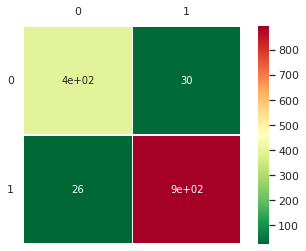

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.932     0.923     0.927       429
           1      0.964     0.969     0.966       921

    accuracy                          0.954      1350
   macro avg      0.948     0.946     0.947      1350
weighted avg      0.954     0.954     0.954      1350



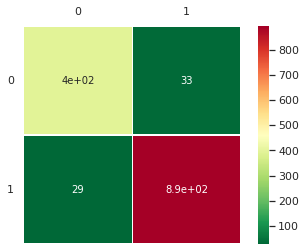

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.849     0.800     0.824       429
           1      0.909     0.934     0.921       921

    accuracy                          0.891      1350
   macro avg      0.879     0.867     0.872      1350
weighted avg      0.890     0.891     0.890      1350



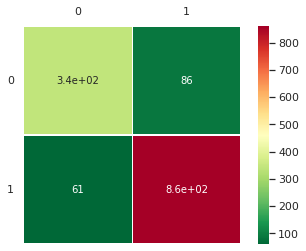

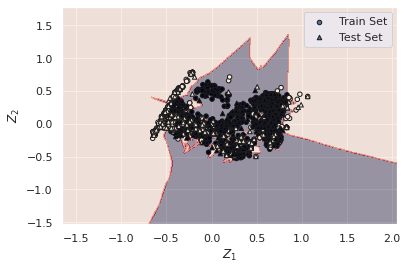

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 16}
depth_Z: {'max_depth': 16}
depth_Z12: {'max_depth': 16}
                                   0         1         2         3         4
dt_full_data fit_time       0.010223  0.010076  0.009930  0.011635  0.009799
dt_Z  fit_time              0.013936  0.014435  0.012712  0.015741  0.013773
dt_Z12 fit_time             0.005275  0.004474  0.004227  0.004468  0.004269
dt_full_data test_f1_macro  0.925211  0.910875  0.921049  0.921767  0.903987
dt_Z  test_f1_macro         0.925406  0.902894  0.905270  0.920257  0.905963
dt_Z12 test_f1_macro        0.916632  0.884881  0.879449  0.885523  0.850943

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.907     0.846     0.876       429
           1      0.931     0.960     0.945       921

    accuracy                          0.924      1350
   macro avg      0.919     0.903     0.910      1350
weighted avg      0.923     0.924 

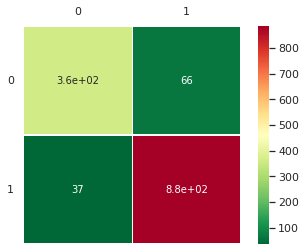

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.914     0.867     0.890       429
           1      0.940     0.962     0.951       921

    accuracy                          0.932      1350
   macro avg      0.927     0.915     0.920      1350
weighted avg      0.931     0.932     0.931      1350



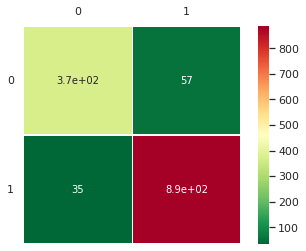

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.872     0.779     0.823       429
           1      0.902     0.947     0.924       921

    accuracy                          0.893      1350
   macro avg      0.887     0.863     0.873      1350
weighted avg      0.892     0.893     0.892      1350



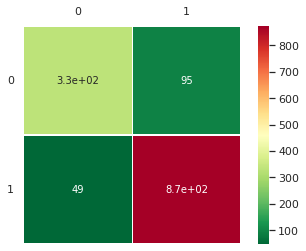

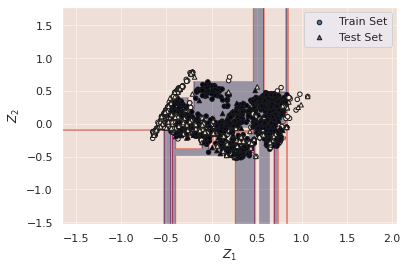

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


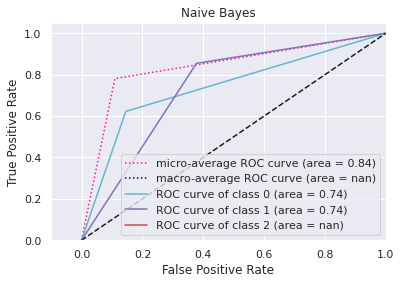

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


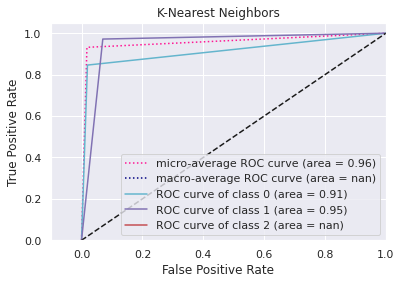

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


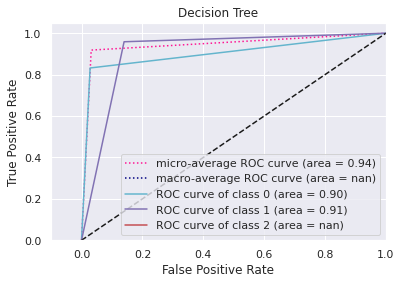

DATASET: Z


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


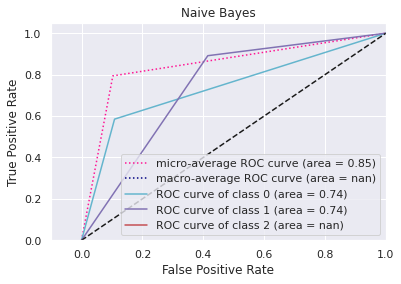

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


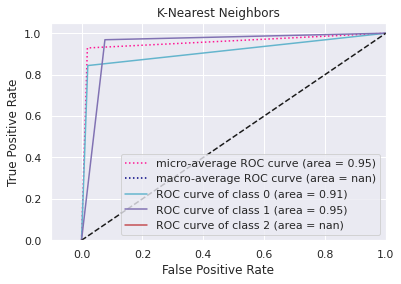

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


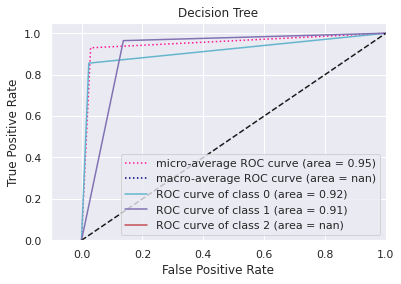

DATASET: Z12


/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


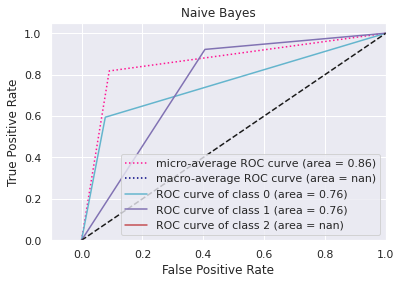

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


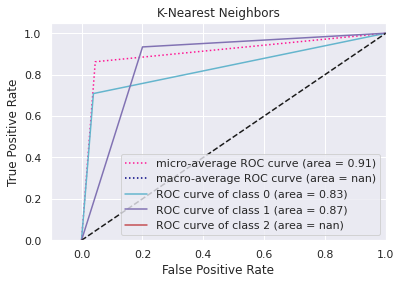

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


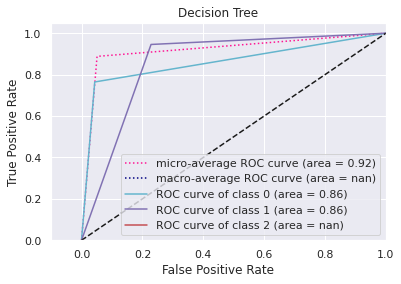

In [ ]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

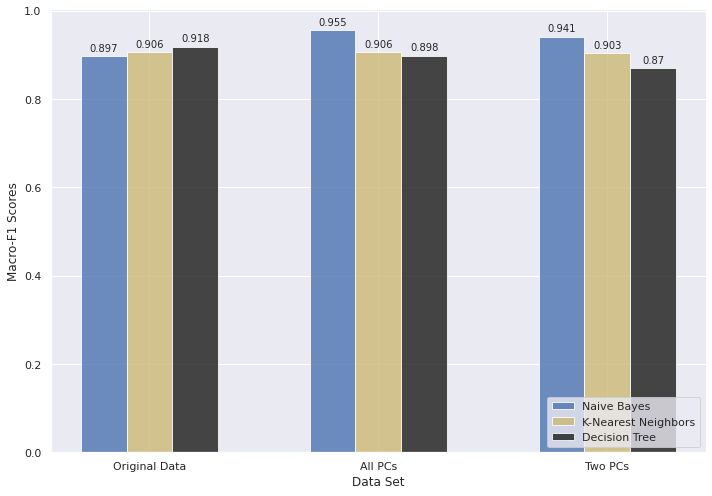

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()